In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## Import the Data 

In [31]:
df = pd.read_csv('BTC_Trial_NB.csv')
df.head()

,Date,Month,Year,VOL1,VOL7,VOL30,ClosePrice,OpenPrice,HighPrice,LowPrice,Market Volumn,Average Block Size,Average Transaction Per Block,Hash Rate,Network Difficulty,Unique Addresses,Transactions Per Second,SP500,RUSSELL,Oil,Gold,Silver,USDEUR,USDYUAN,Interest Rate,Economic Uncertainty,Crypto Index
0,04/02/2018,2,2018,0.058984,0.104624,0.204218,8277.01,9175.70,9334.87,8031.22,7.073550e+09,0.99,975.77,23033142.1,2.603080e+12,396695,2.05,2648.94,1491.09,64.18,1336.5,16.71,0.80,6.30,1.80,0.234505,30
1,05/02/2018,2,2018,0.082982,0.130688,0.219808,6955.27,8270.54,8364.84,6756.68,9.285290e+09,1.10,1169.53,23938939.8,2.603080e+12,486554,1.93,2648.94,1491.09,64.18,1336.5,16.67,0.80,6.31,1.80,0.248054,15
2,06/02/2018,2,2018,0.041061,0.134668,0.221316,7754.00,7051.75,7850.70,6048.26,1.399980e+10,1.07,1436.00,24293141.3,2.607870e+12,589897,2.47,2695.14,1507.17,63.48,1329.5,16.58,0.81,6.29,1.82,0.223228,40
3,07/02/2018,2,2018,0.041213,0.136422,0.222866,7621.30,7755.49,8509.11,7236.79,9.169280e+09,1.07,1515.74,20149017.2,2.874670e+12,489403,2.69,2681.66,1507.97,61.91,1314.6,16.24,0.81,6.28,1.85,0.201785,24
4,08/02/2018,2,2018,0.030796,0.130387,0.222486,8265.59,7637.86,8558.77,7637.86,9.346750e+09,1.05,1322.82,18720008.9,2.874670e+12,398608,2.39,2581.00,1463.79,61.30,1319.0,16.34,0.82,6.27,1.85,0.183604,11


In [45]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace= True)
df.head()

,Month,Year,VOL1,VOL7,VOL30,ClosePrice,OpenPrice,HighPrice,LowPrice,Market Volumn,Average Block Size,Average Transaction Per Block,Hash Rate,Network Difficulty,Unique Addresses,Transactions Per Second,SP500,RUSSELL,Oil,Gold,Silver,USDEUR,USDYUAN,Interest Rate,Economic Uncertainty,Crypto Index
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-02-04,2,2018,0.058984,0.104624,0.204218,8277.01,9175.70,9334.87,8031.22,7.073550e+09,0.99,975.77,23033142.1,2.603080e+12,396695,2.05,2648.94,1491.09,64.18,1336.5,16.71,0.80,6.30,1.80,0.234505,30
2018-02-05,2,2018,0.082982,0.130688,0.219808,6955.27,8270.54,8364.84,6756.68,9.285290e+09,1.10,1169.53,23938939.8,2.603080e+12,486554,1.93,2648.94,1491.09,64.18,1336.5,16.67,0.80,6.31,1.80,0.248054,15
2018-02-06,2,2018,0.041061,0.134668,0.221316,7754.00,7051.75,7850.70,6048.26,1.399980e+10,1.07,1436.00,24293141.3,2.607870e+12,589897,2.47,2695.14,1507.17,63.48,1329.5,16.58,0.81,6.29,1.82,0.223228,40
2018-02-07,2,2018,0.041213,0.136422,0.222866,7621.30,7755.49,8509.11,7236.79,9.169280e+09,1.07,1515.74,20149017.2,2.874670e+12,489403,2.69,2681.66,1507.97,61.91,1314.6,16.24,0.81,6.28,1.85,0.201785,24
2018-02-08,2,2018,0.030796,0.130387,0.222486,8265.59,7637.86,8558.77,7637.86,9.346750e+09,1.05,1322.82,18720008.9,2.874670e+12,398608,2.39,2581.00,1463.79,61.30,1319.0,16.34,0.82,6.27,1.85,0.183604,11


In [46]:
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2310 entries, 2018-02-04 to 2024-06-01
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Month                          2310 non-null   int64  
 1   Year                           2310 non-null   int64  
 2   VOL1                           2310 non-null   float64
 3   VOL7                           2310 non-null   float64
 4   VOL30                          2310 non-null   float64
 5   ClosePrice                     2310 non-null   float64
 6   OpenPrice                      2310 non-null   float64
 7   HighPrice                      2310 non-null   float64
 8   LowPrice                       2310 non-null   float64
 9   Market Volumn                  2310 non-null   float64
 10  Average Block Size             2310 non-null   float64
 11  Average Transaction Per Block  2310 non-null   float64
 12  Hash Rate                     

In [47]:
df.isna().sum()

Month                            0
Year                             0
VOL1                             0
VOL7                             0
VOL30                            0
ClosePrice                       0
OpenPrice                        0
HighPrice                        0
LowPrice                         0
Market Volumn                    0
Average Block Size               0
Average Transaction Per Block    0
Hash Rate                        0
Network Difficulty               0
Unique Addresses                 0
Transactions Per Second          0
SP500                            0
RUSSELL                          0
Oil                              0
Gold                             0
Silver                           0
USDEUR                           0
USDYUAN                          0
Interest Rate                    0
Economic Uncertainty             0
Crypto Index                     0
dtype: int64

## Close price prediction using 1 variable

Plotting the Close Price of BTC from 2018 to 2024

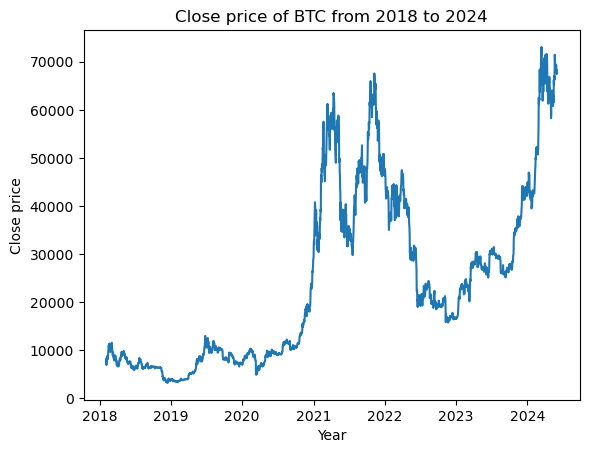

In [50]:
plt.plot(df['ClosePrice '])
plt.xlabel('Year')
plt.ylabel('Close price')
plt.title('Close price of BTC from 2018 to 2024')
plt.show()

## 1. Data Preprocessing

### 1.1 Create the input vector from Close Price column

In [65]:
close_df = df['ClosePrice '].values
close_df.shape

(2310,)

### 1.2 Scale the data

In [66]:
scaler = MinMaxScaler(feature_range= (0,1))
scaled_close_df = scaler.fit_transform(close_df.reshape(-1,1))
scaled_close_df.shape

(2310, 1)

### 1.3 Create the reshaped input vector for the LSTM model 

In [67]:
def df_to_X_y(df, wind_size=5):
    X = [] 
    y = []
    for i in range(len(df) - wind_size):
        row = [a for a in df[i : i+wind_size]] 
        X.append(row)
        label = df[i+wind_size] 
        y.append(label)
    return np.array(X), np.array(y) 

The input of the model is the scaled data of the closing price, with the time atep (window) of 30 observations

In [68]:
X, y = df_to_X_y(scaled_close_df, 30)
X.shape, y.shape

((2280, 30, 1), (2280, 1))

### 1.4 Train test split 

In [69]:
train_size = int(np.ceil(close_df.shape[0] * .8))
train_size

1848

In [64]:
X_train, y_train = X[: train_size], y[: train_size]
X_test, y_test = X[train_size:], y[train_size :]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1848, 30, 1), (1848, 1), (432, 30, 1), (432, 1))

## 2. Deep learning modelling: LSTM model with 1 LSTM layer and 2 Dense layers (Vanilla)

### 2.1 Fitting the model

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import *
from tensorflow.keras.losses import MeanSquaredError 
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [72]:
model = Sequential()
model.add(InputLayer((X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(loss = MeanSquaredError(), optimizer= Adam(learning_rate= 0.001), metrics= [RootMeanSquaredError()])

In [75]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128) 

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 0.1176 - root_mean_squared_error: 0.3411 - val_loss: 0.0291 - val_root_mean_squared_error: 0.1707
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0115 - root_mean_squared_error: 0.1071 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0796
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0029 - root_mean_squared_error: 0.0542 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0473
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0017 - root_mean_squared_error: 0.0416 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0457
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0016 - root_mean_squared_error: 0.0402 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0419
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0014 - root_mean_squared_error: 0.0381 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0506
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss

### 2.2 Model's prediction and evaluation

Model's prediction on the training set:

In [76]:
train_pred = model.predict(X_train).flatten()
train_pred

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


array([0.10678747, 0.10745312, 0.10681912, ..., 0.33475128, 0.33874026,
       0.342504  ], dtype=float32)

In [77]:
train_result = pd.DataFrame(data= {'Train Pred':train_pred, 'Actual':y_train.flatten()})
train_result

,Train Pred,Actual
0,0.106787,0.107996
1,0.107453,0.096337
2,0.106819,0.088168
3,0.105142,0.087345
4,0.103046,0.080594
...,...,...
1843,0.322828,0.359318
1844,0.329755,0.347282
1845,0.334751,0.347303
1846,0.338740,0.354456


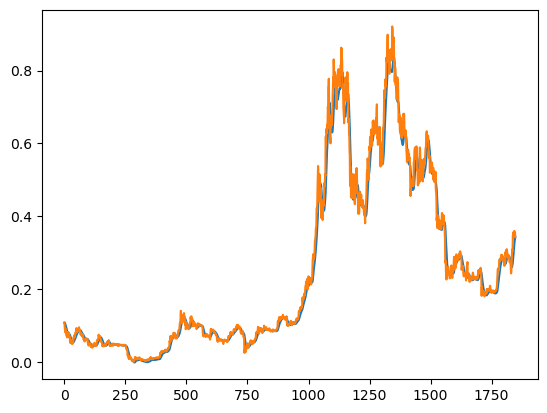

In [78]:
plt.plot(train_result['Train Pred'])
plt.plot(train_result['Actual'])

Model's prediction on the test set:

In [79]:
test_pred = model.predict(X_test).flatten()
test_result = pd.DataFrame(data= {'Test Pred':test_pred, 'Actual':y_test.flatten()})
test_result

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


,Test Pred,Actual
0,0.344423,0.344059
1,0.345745,0.359525
2,0.347980,0.355017
3,0.349530,0.361387
4,0.351398,0.360422
...,...,...
427,0.893217,0.931460
428,0.893825,0.921179
429,0.892389,0.932445
430,0.891439,0.919938


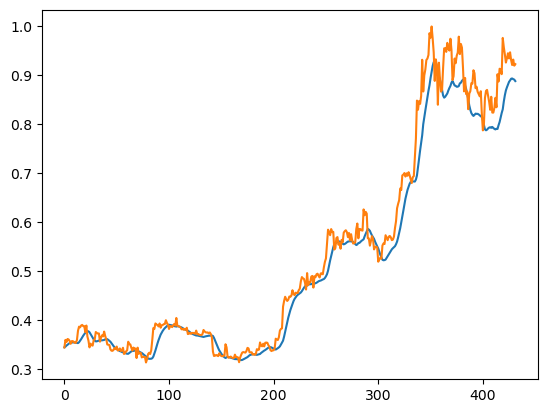

In [80]:
plt.plot(test_result['Test Pred'])
plt.plot(test_result['Actual'])

The RMSE of the predicted value on the Test data: 

In [137]:
RMSE_1 = np.sqrt(mean_squared_error(y_test, test_pred))
RMSE_1

0.03932468560552709

## 3. Hyperparameter tuning: Tuning model with 2 lstm layers and 2 Dense layers 

### 3.1 Initialize the model tunning function

In [104]:
import keras_tuner as kt

In [120]:
def build_model(hp):
    model = Sequential()
    model.add(InputLayer((X_train.shape[1], X_train.shape[2])))
    
    lstm_units = hp.Choice('lstm_units', values=[32, 64, 128])
    model.add(LSTM(lstm_units, return_sequences=True))
    
    dropout_rate = hp.Choice('dropout_rate', values=[0.0, 0.2, 0.4])
    model.add(Dropout(dropout_rate))
    
    model.add(LSTM(lstm_units))
    model.add(Dropout(dropout_rate))
    
    activation_function = hp.Choice('activation_function', values=['relu', 'tanh'])
    dense_units = hp.Choice('dense_units', values=[8, 16, 32, 64])  
    model.add(Dense(dense_units, activation=activation_function))
    model.add(Dense(1, activation='linear'))
    
    learning_rate = hp.Choice('learning_rate', values=[0.001, 0.01, 0.1])
    model.compile(
        loss=MeanSquaredError(),
        optimizer=Adam(learning_rate=learning_rate),
        metrics=[RootMeanSquaredError()]
    )
    return model

In [118]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=30,
    executions_per_trial=1,
    directory='my_model1',
    project_name='lstm_tuning'
)

### 3.2 Start the tuning process

We set the number of epoch equals 20 with the batch size of 32. The model uses the Test set as the validation data. 

In [119]:
tuner.search(
    X_train, y_train,
    epochs= 20,
    batch_size= 32,
    validation_data=(X_test, y_test)
)

Trial 30 Complete [00h 01m 11s]
val_loss: 0.0005696906591765583

Best val_loss So Far: 0.00033684339723549783
Total elapsed time: 02h 53m 53s


Obtaining the best performing model and set it to "best_model"

In [121]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model

c:\Users\Ha Tung Lam\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


<Sequential name=sequential, built=True>

This is the result of the 10 best performing model:

In [122]:
tuner.results_summary()

Results summary
Results in my_model1\lstm_tuning
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 00 summary
Hyperparameters:
lstm_units: 128
dropout_rate: 0.0
activation_function: tanh
dense_units: 16
learning_rate: 0.001
Score: 0.00033684339723549783

Trial 06 summary
Hyperparameters:
lstm_units: 128
dropout_rate: 0.0
activation_function: relu
dense_units: 16
learning_rate: 0.01
Score: 0.00034191590384580195

Trial 21 summary
Hyperparameters:
lstm_units: 64
dropout_rate: 0.2
activation_function: tanh
dense_units: 8
learning_rate: 0.01
Score: 0.00040735348011367023

Trial 25 summary
Hyperparameters:
lstm_units: 128
dropout_rate: 0.0
activation_function: relu
dense_units: 32
learning_rate: 0.001
Score: 0.00041299048461951315

Trial 07 summary
Hyperparameters:
lstm_units: 64
dropout_rate: 0.2
activation_function: tanh
dense_units: 16
learning_rate: 0.01
Score: 0.0004311187658458948

Trial 02 summary
Hyperparameters:
lstm_units: 32
dropout_rate: 0.0
activation_fu

We extract the hyperparameters from the best performing model and set it to "best_hp"

In [138]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The best hyperparameters are:
- lstm_units: {best_hps.get('lstm_units')}
- dropout_rate: {best_hps.get('dropout_rate')}
- activation function: {best_hps.get('activation_function')}
- dense_units: {best_hps.get('dense_units')}
- learning_rate: {best_hps.get('learning_rate')}
""")


The best hyperparameters are:
- lstm_units: 128
- dropout_rate: 0.0
- activation function: tanh
- dense_units: 16
- learning_rate: 0.001



Predicting the value of the Test data using best_model:

In [125]:
y_test_best_pred = best_model.predict(X_test).flatten()
best_test_result = pd.DataFrame(data= {'Test Pred':y_test_best_pred, 'Actual':y_test.flatten()})

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [126]:
best_test_result

,Test Pred,Actual
0,0.345111,0.344059
1,0.343046,0.359525
2,0.348897,0.355017
3,0.353159,0.361387
4,0.357981,0.360422
...,...,...
427,0.933119,0.931460
428,0.927396,0.921179
429,0.915616,0.932445
430,0.916656,0.919938


### 3.3 Tuned-model evaluation:

The RMSE of best_model on the Test data:

In [135]:
RMSE_tuned = np.sqrt(mean_squared_error(y_test, y_test_best_pred))
RMSE_tuned

0.018353294261683563

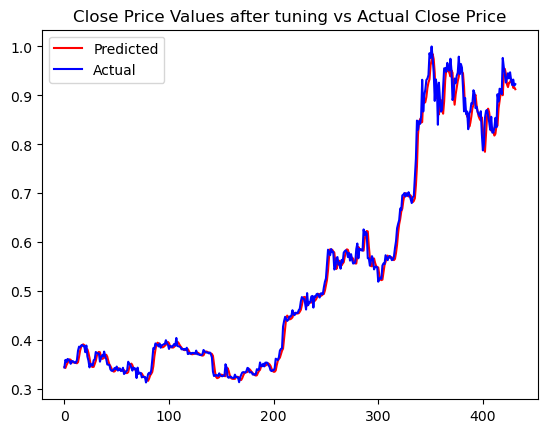

In [139]:
plt.plot(best_test_result['Test Pred'], label='Predicted', color='red')
plt.plot(best_test_result['Actual'], label='Actual', color='blue')
plt.title('Close Price Values after tuning vs Actual Close Price')
plt.legend(loc='upper left')

## 4. Comparision of LSTM model's performance before and after tuning

Comparing the RMSE results of both model: 

In [140]:
print(f"""
The RMSE of pre-tuned model on the Test set: {RMSE_1}
The RMSE of  the optimized model on the Test set: {RMSE_tuned}
""")


The RMSE of pre-tuned model on the Test set: 0.03932468560552709
The RMSE of  the optimized model on the Test set: 0.018353294261683563



The optimized model performs much better than the first Vanilla model with lower Root Mean Squared Error on the Test data 

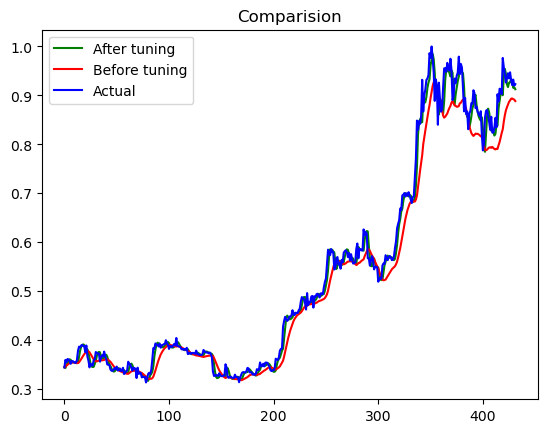

In [141]:
plt.plot(best_test_result['Test Pred'], label='After tuning', color='green')
plt.plot(test_result['Test Pred'], label='Before tuning', color='red')
plt.plot(test_result['Actual'], label='Actual', color='blue')
plt.title('Comparision')
plt.legend(loc='upper left')

## Vol_1 Prediction 

In [182]:
vol1_df = df['VOL1'].values
vol1_df.shape

(2310,)

In [183]:
scaler = MinMaxScaler(feature_range= (0,1))
vol1_scaled_df = scaler.fit_transform(vol1_df.reshape(-1,1))
vol1_scaled_df.shape

(2310, 1)

In [184]:
X_vol1, y_vol1 = df_to_X_y(vol1_scaled_df, 30)
X_vol1.shape, y_vol1.shape

((2280, 30, 1), (2280, 1))

In [185]:
X_train_vol1, y_train_vol1 = X_vol1[: train_size], y_vol1[: train_size]
X_test_vol1, y_test_vol1 = X_vol1[train_size:], y_vol1[train_size :]

X_train_vol1.shape, y_train_vol1.shape, X_test_vol1.shape, y_test_vol1.shape

((1848, 30, 1), (1848, 1), (432, 30, 1), (432, 1))

In [186]:
def build_model_vol1(hp):
    model = Sequential()
    model.add(InputLayer((X_train.shape[1], X_train.shape[2])))
    
    lstm_units = hp.Choice('lstm_units', values=[32, 64, 128, 256])
    model.add(LSTM(lstm_units, return_sequences=True))
    
    dropout_rate = hp.Choice('dropout_rate', values=[0.0, 0.2, 0.4])
    model.add(Dropout(dropout_rate))
    
    model.add(LSTM(lstm_units))
    model.add(Dropout(dropout_rate))
    
    activation_function = hp.Choice('activation_function', values=['relu', 'tanh'])
    dense_units = hp.Choice('dense_units', values=[16, 32, 64])  
    model.add(Dense(dense_units, activation=activation_function))
    model.add(Dense(1, activation='linear'))
    
    learning_rate = hp.Choice('learning_rate', values=[0.001, 0.01, 0.1])
    model.compile(
        loss=MeanSquaredError(),
        optimizer=Adam(learning_rate=learning_rate),
        metrics=[RootMeanSquaredError()]
    )
    return model

In [278]:
tuner_vol1 = kt.RandomSearch(
    build_model_vol1,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=1,
    directory='my_model_vol1',
    project_name='lstm_tuning_v1'
)

Reloading Tuner from my_model_vol1\lstm_tuning_v1\tuner0.json


In [279]:
tuner_vol1.search(
    X_train_vol1, y_train_vol1,
    epochs= 20,
    batch_size= 32,
    validation_data=(X_test_vol1, y_test_vol1)
)

In [280]:
best_model_vol1 = tuner_vol1.get_best_models(num_models=1)[0]

c:\Users\Ha Tung Lam\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [281]:
tuner_vol1.results_summary()

Results summary
Results in my_model_vol1\lstm_tuning_v1
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 01 summary
Hyperparameters:
lstm_units: 128
dropout_rate: 0.0
activation_function: tanh
dense_units: 16
learning_rate: 0.01
Score: 0.0013323368038982153

Trial 17 summary
Hyperparameters:
lstm_units: 256
dropout_rate: 0.2
activation_function: tanh
dense_units: 32
learning_rate: 0.001
Score: 0.0013529702555388212

Trial 03 summary
Hyperparameters:
lstm_units: 64
dropout_rate: 0.0
activation_function: tanh
dense_units: 32
learning_rate: 0.01
Score: 0.0013584864791482687

Trial 06 summary
Hyperparameters:
lstm_units: 64
dropout_rate: 0.4
activation_function: tanh
dense_units: 32
learning_rate: 0.01
Score: 0.0013807301875203848

Trial 11 summary
Hyperparameters:
lstm_units: 256
dropout_rate: 0.4
activation_function: relu
dense_units: 32
learning_rate: 0.001
Score: 0.0013860425679013133

Trial 07 summary
Hyperparameters:
lstm_units: 64
dropout_rate: 0.2
activatio

In [282]:
best_hps_vol1 = tuner_vol1.get_best_hyperparameters(num_trials=1)[0]

In [283]:
print(f"""
The best hyperparameters are:
- lstm_units: {best_hps_vol1.get('lstm_units')}
- dropout_rate: {best_hps_vol1.get('dropout_rate')}
- activation function: {best_hps_vol1.get('activation_function')}
- dense_units: {best_hps_vol1.get('dense_units')}
- learning_rate: {best_hps_vol1.get('learning_rate')}
""")


The best hyperparameters are:
- lstm_units: 128
- dropout_rate: 0.0
- activation function: tanh
- dense_units: 16
- learning_rate: 0.01



In [284]:
y_test_best_pred_vol1 = best_model_vol1.predict(X_test_vol1).flatten()
best_test_result_vol1 = pd.DataFrame(data= {'Test Pred':y_test_best_pred_vol1, 'Actual':y_test_vol1.flatten()})
best_test_result_vol1

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step


,Test Pred,Actual
0,0.086702,0.079889
1,0.082037,0.091336
2,0.079682,0.111259
3,0.083197,0.064627
4,0.075742,0.028034
...,...,...
427,0.059493,0.078970
428,0.063500,0.039090
429,0.055410,0.057859
430,0.055436,0.047275


In [285]:
RMSE_vol1 = np.sqrt(mean_squared_error(y_test_vol1, y_test_best_pred_vol1))
RMSE_vol1

0.036501192698719355

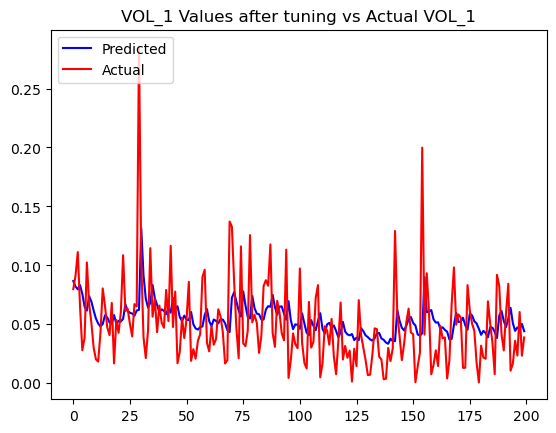

In [286]:
plt.plot(best_test_result_vol1['Test Pred'][:200], label='Predicted', color='blue')
plt.plot(best_test_result_vol1['Actual'][:200], label='Actual', color='red')
plt.title('VOL_1 Values after tuning vs Actual VOL_1')
plt.legend(loc='upper left')